<a href="https://colab.research.google.com/github/KMeghana7/CODSOFT/blob/main/STOCK%20PREDICTION%20MODEL%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)


In [ ]:
# Fetch stock data
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2015-01-01", end="2023-01-01")

# Display first few rows
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320436  24.789806  23.879985  24.778683  212818400
2015-01-05  23.635286  24.169166  23.448429  24.089084  257142000
2015-01-06  23.637508  23.897774  23.274914  23.699794  263188400
2015-01-07  23.968960  24.069062  23.735387  23.846612  160423600
2015-01-08  24.889906  24.947743  24.180291  24.298190  237458000


In [ ]:
# Use only 'Close' price
data = data[['Close']]

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Convert data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Number of past days to use for prediction

# Create sequences
X, y = create_sequences(data_scaled, seq_length)

# Split into training (80%) and testing (20%) sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Print shapes
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (1571, 50, 1), Testing Data: (393, 50, 1)


In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0198 - val_loss: 0.0018
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.5486e-04 - val_loss: 0.0023
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.5831e-04 - val_loss: 0.0019
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.1013e-04 - val_loss: 0.0020
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.7660e-04 - val_loss: 0.0039
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.0941e-04 - val_loss: 0.0032
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.8893e-04 - val_loss: 0.0035
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 5.4347e-04 - val_loss: 0.0017
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 2.7187e-04 - val_loss: 0.0014
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.5421e-04 - val_loss: 0.0013
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.3799e-04 - val_loss: 0.0012
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


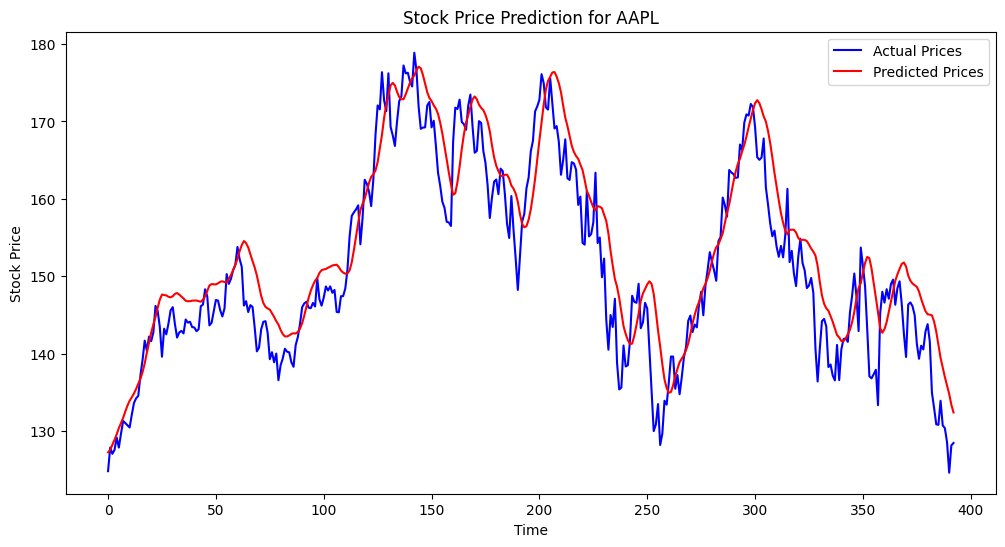

In [ ]:
# Predict on test data
predictions = model.predict(X_test)

# Convert predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title(f"Stock Price Prediction for {stock_symbol}")
plt.show()


In [ ]:
# Save the model
model.save("stock_prediction_lstm.h5")
